In [1]:
import numpy as np 
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display as ipd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import ModelCheckpoint
from datetime import datetime
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, LSTM, BatchNormalization
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from scipy.io import wavfile as wav
from keras.models import load_model
import tensorflow as tf
print(tf.__version__)


2.18.0


In [2]:
audio1= "D:/Joy/Research_Joy/Music_Research/all_dataset/2s_clips/Karaharapriya_1.wav"

In [3]:
data,sr1=librosa.load(audio1)
ipd.Audio(audio1)

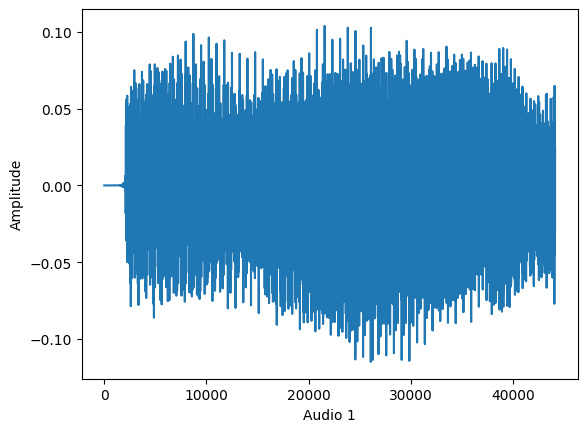

In [4]:
plt.plot(data)
plt.xlabel('Audio 1')
plt.ylabel('Amplitude')
plt.show()

In [5]:
wavesr2, wave_audio=wav.read(audio1)

In [6]:
wavesr2

44100

In [7]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [ 328, 1140],
       [ 335, 1190],
       [ 316, 1209]], dtype=int16)

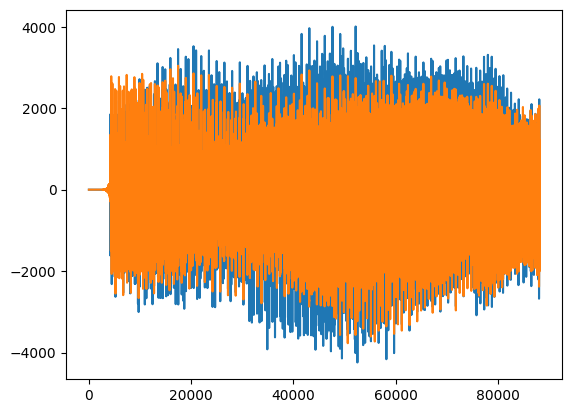

In [8]:
plt.plot(wave_audio)
plt.show()

In [9]:

folder_path = 'D:/Joy/Research_Joy/Music_Research/all_dataset/2s_clips'
file_names = [file for file in os.listdir(folder_path) if file.endswith('.wav')]

# Extract the text before '_' for each file name
raga_name = [name.split('_')[0] for name in file_names]

print(raga_name)

['Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriy

In [10]:
print(file_names[:5])
print(raga_name[:5])

['Karaharapriya_1.wav', 'Karaharapriya_10.wav', 'Karaharapriya_100.wav', 'Karaharapriya_1000.wav', 'Karaharapriya_1001.wav']
['Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya']


In [11]:
def features_extractor(file_or_audio, sample_rate=None):
    if isinstance(file_or_audio, str):
        audio, sample_rate = librosa.load(file_or_audio)
    else:
        audio = file_or_audio

    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs.T, axis=0)
    return mfccs_scaled_features

In [12]:
extracted_features = []
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    features = features_extractor(file_path)
    file_name = file_name.title()
    extracted_features.append([features, file_name.split('_')[0]])
print(extracted_features)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [13]:
features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
features_df.head()

,feature,class
0,"[-329.2326, 150.1223, 9.094531, 13.20528, -30....",Karaharapriya
1,"[-81.73126, 101.639725, -48.799183, 43.963608,...",Karaharapriya
2,"[-194.38118, 118.95462, -20.79352, 60.05325, -...",Karaharapriya
3,"[-159.79567, 133.81792, -30.004347, 41.42718, ...",Karaharapriya
4,"[-91.41185, 109.37446, -46.92378, 37.05603, -3...",Karaharapriya


In [14]:
X=np.array(features_df['feature'].tolist())
y=np.array(features_df['class'].tolist())
le=LabelEncoder()
ti=le.fit_transform(y)
y=to_categorical(ti)

In [15]:
y.shape

(37541, 5)

In [16]:
originallabels=le.classes_
print("Original labels: ", originallabels)
print("Encoded labels: ", np.unique(ti))

Original labels:  ['Karaharapriya' 'Keeravani' 'Sarasangi' 'Shanmugapriya' 'Thodi']
Encoded labels:  [0 1 2 3 4]


In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=127)

In [18]:
X_train.shape

(30032, 40)

In [19]:
y_train.shape

(30032, 5)

In [20]:
X_train.shape

(30032, 40)

In [21]:
y_test.shape

(7509, 5)

In [22]:
num_labels = y.shape[1]
print(num_labels)

5


In [23]:
X_train_flat = np.array([x.flatten() for x in X_train])
X_test_flat = np.array([x.flatten() for x in X_train])


In [24]:
num_classes = 5
model = Sequential()
model.add(Conv1D(64, kernel_size=5, activation='relu', input_shape=(X_train_flat.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Conv1D(128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

D:\Joy\Research_Joy\Music_Research\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 36, 64)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 18, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 18, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 14, 128)             │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 7, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 7, 128)              │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,157 (942.02 KB)

 Trainable params: 240,773 (940.52 KB)

 Non-trainable params: 384 (1.50 KB)

In [26]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

In [27]:
num_classes = 5
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_epochs = 30
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_model_2s.keras', verbose=1, save_best_only=True)

start = datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, 
          validation_data=(X_test, y_test), verbose=1, callbacks=[checkpointer])

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/30
935/939 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6869 - loss: 0.8206
Epoch 1: val_loss improved from inf to 0.20301, saving model to saved_model_2s.keras
939/939 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6876 - loss: 0.8190 - val_accuracy: 0.9323 - val_loss: 0.2030
Epoch 2/30
933/939 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9366 - loss: 0.1922
Epoch 2: val_loss improved from 0.20301 to 0.17839, saving model to saved_model_2s.keras
939/939 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9366 - loss: 0.1920 - val_accuracy: 0.9389 - val_loss: 0.1784
Epoch 3/30
936/939 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9646 - loss: 0.1105
Epoch 3: val_loss improved from 0.17839 to 0.10431, saving model to saved_model_2s.keras
939/939 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9646 - loss: 0.1105 - val_accuracy: 0.9674 - val_loss: 0.1043
Epoch 4/30
937/939 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9768 - loss: 0.0733
Epoch 4: val_loss improved from 0.10431 t

In [28]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f"test set accuracy: {test_accuracy[1] * 100}%")

train_accuracy=model.evaluate(X_train,y_train,verbose=0)
print(f"train set accuracy: {train_accuracy[1] * 100}%")

test set accuracy: 98.3353316783905%
train set accuracy: 99.61374402046204%


In [29]:
saved_model = load_model('saved_model_2s.keras')
np.save('label_encoder_classes_ragas_2s.npy', le.classes_)

In [30]:
y_pred = saved_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print("Confusion Matrix:")
print(conf_matrix)

print("\nF1 Score:")
print(f1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=originallabels))

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Confusion Matrix:
[[1481    2   10    5    9]
 [   2 1495   10    3    4]
 [   4    1 1374   11   16]
 [   3    4    7 1584    8]
 [   7    1    9    9 1450]]

F1 Score:
0.9833656575674871

Classification Report:
               precision    recall  f1-score   support

Karaharapriya       0.99      0.98      0.99      1507
    Keeravani       0.99      0.99      0.99      1514
    Sarasangi       0.97      0.98      0.98      1406
Shanmugapriya       0.98      0.99      0.98      1606
        Thodi       0.98      0.98      0.98      1476

     accuracy                           0.98      7509
    macro avg       0.98      0.98      0.98      7509
 weighted avg       0.98      0.98      0.98      7509



In [31]:
file ="D:/Joy/Research_Joy/Music_Research/all_dataset/2s_clips/Karaharapriya_1.wav"
x,sr1 = librosa.load(file)
ipd.Audio(x,rate=sr1)

In [32]:
prediction_feature = features_extractor(file)
prediction_feature = prediction_feature.reshape(1,-1)
predicted_probabilities = model.predict(prediction_feature)
predicted_class_label = np.argmax(predicted_probabilities)
predicted_class_label = np.array([predicted_class_label])

prediction_class = le.inverse_transform(predicted_class_label)
print("Predicted class:", prediction_class[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
Predicted class: Karaharapriya
